In [99]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [100]:
df=pd.read_csv('TimeSeries.csv')
df.head()

,Month,Sales
0,2005-01,10827
1,2005-02,12049
2,2005-03,18298
3,2005-04,17834
4,2005-05,16480


In [101]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [102]:
df.tail()

,Month,Sales
148,2017-05,31739
149,2017-06,30315
150,2017-07,25046
151,2017-08,23285
152,2017-09,26721


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   153 non-null    object
 1   Sales   153 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [104]:
df['Month']=pd.to_datetime(df['Month'])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   153 non-null    datetime64[ns]
 1   Sales   153 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [106]:
df.head()

,Month,Sales
0,2005-01-01,10827
1,2005-02-01,12049
2,2005-03-01,18298
3,2005-04-01,17834
4,2005-05-01,16480


In [107]:
df.set_index('Month',inplace=True)

In [108]:
df.head()

,Sales
Month,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480


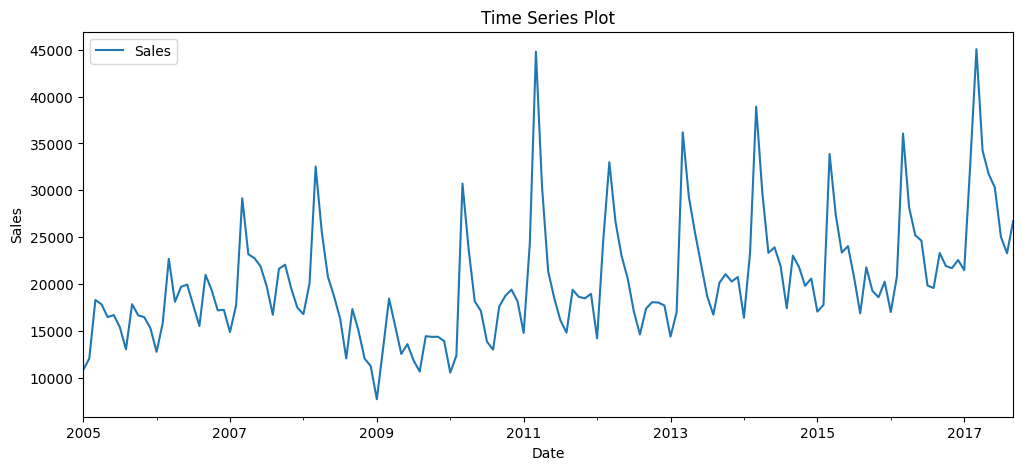

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
df.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Time Series Plot')
plt.show()

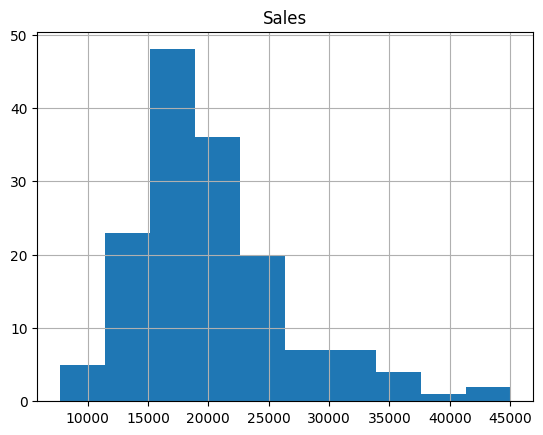

In [110]:
from matplotlib import pyplot
df.hist()
pyplot.show()

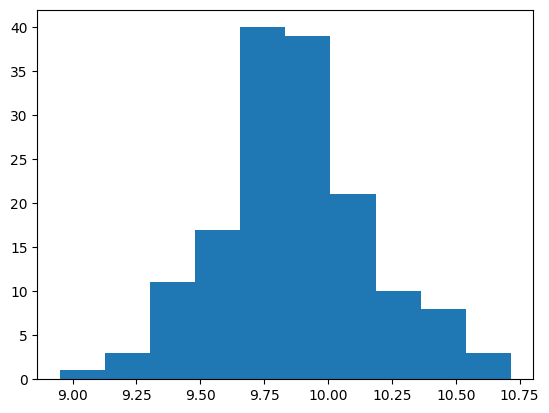

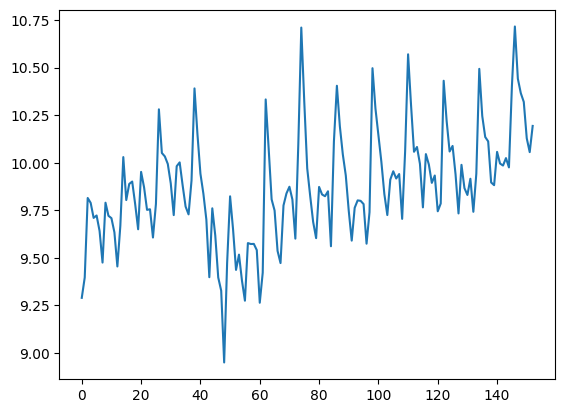

In [111]:
from numpy import log
X_log = log(df.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [112]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = df.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))

mean1=9.747423, mean2=9.997714
variance1=0.081881, variance2=0.059733


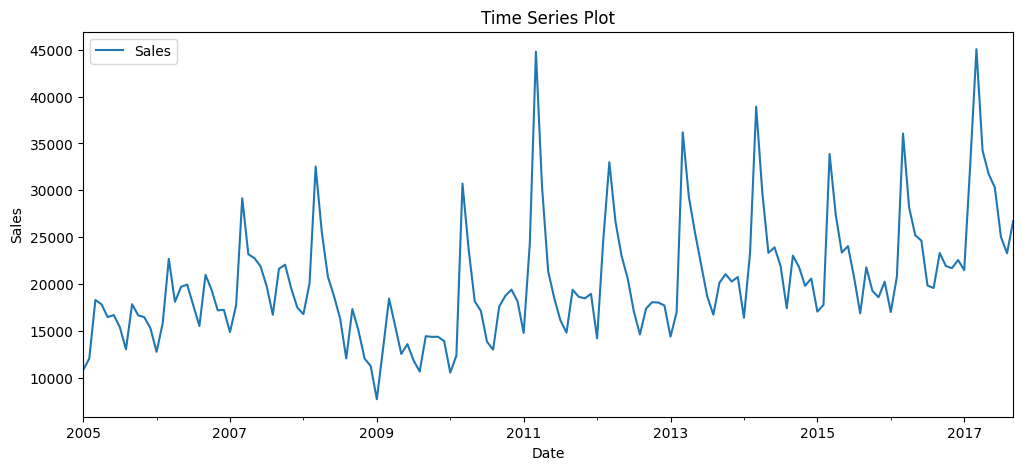

In [113]:
fig, ax = plt.subplots(figsize=(12, 5))
df.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Time Series Plot')
plt.show()

In [114]:
from statsmodels.tsa.stattools import adfuller

In [115]:
def adf_test(series):
    # Determing rolling statistics
    rolmean = pd.Series(series).rolling(window=12).mean()
    rolstd = pd.Series(series).rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(series, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    if dftest[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

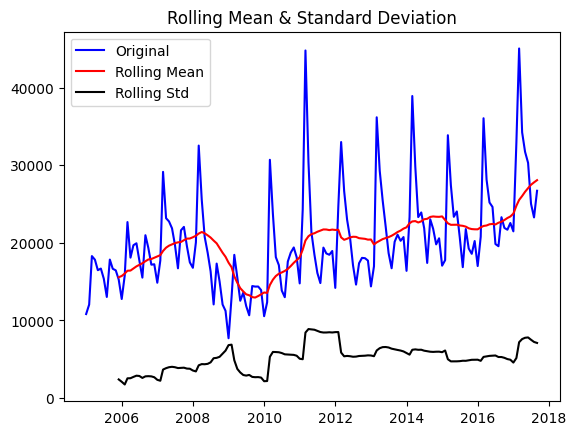

Results of Dickey-Fuller Test:
Test Statistic                  -1.285217
p-value                          0.635908
#Lags Used                      13.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [116]:
adf_test(df['Sales'])

In [117]:
## Use Techniques Differencing
df['First Sales Difference'] = df['Sales']-df['Sales'].shift(1)

In [118]:
df.head()

,Sales,First Sales Difference
Month,,
2005-01-01,10827,NaN
2005-02-01,12049,1222.0
2005-03-01,18298,6249.0
2005-04-01,17834,-464.0
2005-05-01,16480,-1354.0


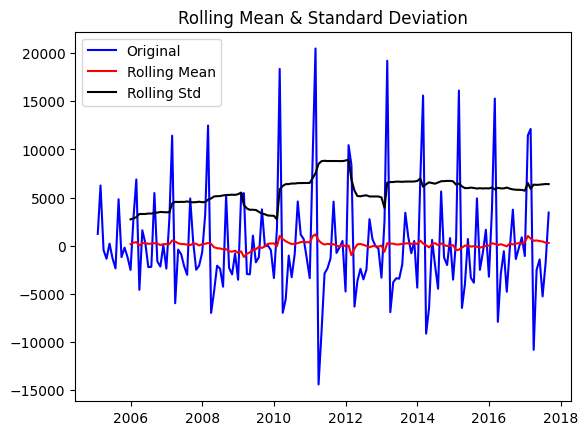

Results of Dickey-Fuller Test:
Test Statistic                  -3.365987
p-value                          0.012174
#Lags Used                      12.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [119]:
adf_test(df['First Sales Difference'].dropna())

In [120]:
## Use Techniques Differencing
df['Second Sales Difference']=df['First Sales Difference']-df['First Sales Difference'].shift(1)

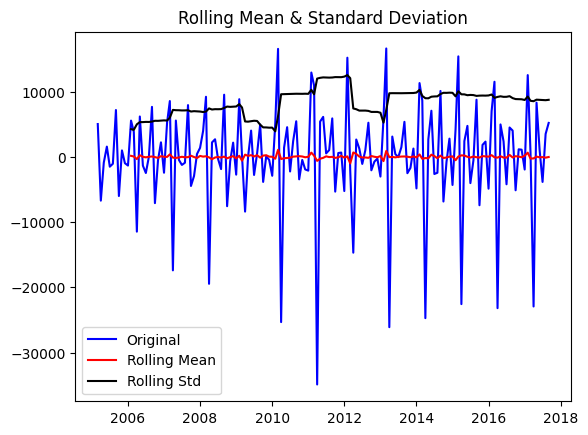

Results of Dickey-Fuller Test:
Test Statistic                -8.352413e+00
p-value                        2.970156e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [121]:
adf_test(df['Second Sales Difference'].dropna())

In [122]:
### 12 months 
## Use Techniques Differencing
df['Sales 12 Difference']=df['Sales']-df['Sales'].shift(12)

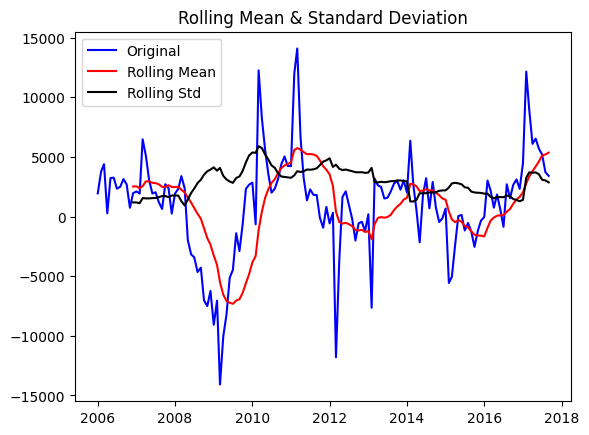

Results of Dickey-Fuller Test:
Test Statistic                  -4.349427
p-value                          0.000364
#Lags Used                      11.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [123]:
adf_test(df['Sales 12 Difference'].dropna())

In [124]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

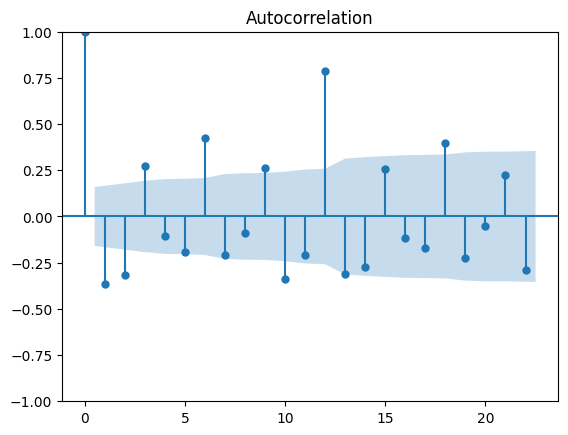

In [35]:
acf = plot_acf(df["Second Sales Difference"].dropna())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


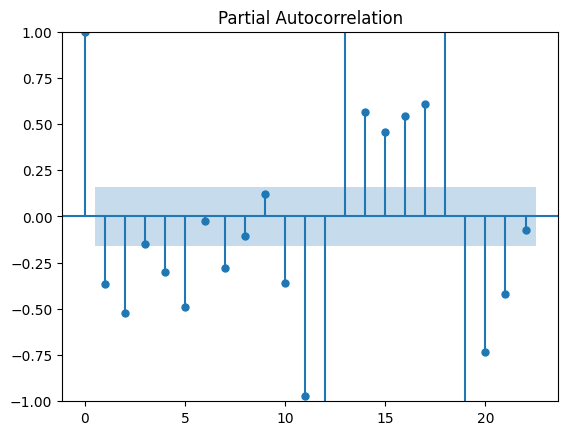

In [37]:
pacf = plot_pacf(df["Second Sales Difference"].dropna())

In [125]:
### split train and test data
df

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference
Month,,,,
2005-01-01,10827,NaN,NaN,NaN
2005-02-01,12049,1222.0,NaN,NaN
2005-03-01,18298,6249.0,5027.0,NaN
2005-04-01,17834,-464.0,-6713.0,NaN
2005-05-01,16480,-1354.0,-890.0,NaN
...,...,...,...,...
2017-05-01,31739,-2509.0,8304.0,6530.0
2017-06-01,30315,-1424.0,1085.0,5681.0
2017-07-01,25046,-5269.0,-3845.0,5193.0


In [92]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2012,3,1)
test_dataset_end=datetime(2017,9,1)

In [126]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [127]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [128]:
test_data

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference
Month,,,,
2012-04-01,26674,-6326.0,-14689.0,-3715.0
2012-05-01,23006,-3668.0,2658.0,1630.0
2012-06-01,20597,-2409.0,1259.0,2109.0
2012-07-01,17100,-3497.0,-1088.0,968.0
2012-08-01,14625,-2475.0,1022.0,-192.0
...,...,...,...,...
2017-05-01,31739,-2509.0,8304.0,6530.0
2017-06-01,30315,-1424.0,1085.0,5681.0
2017-07-01,25046,-5269.0,-3845.0,5193.0


In [129]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [130]:
train_data

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference
Month,,,,
2005-01-01,10827,NaN,NaN,NaN
2005-02-01,12049,1222.0,NaN,NaN
2005-03-01,18298,6249.0,5027.0,NaN
2005-04-01,17834,-464.0,-6713.0,NaN
2005-05-01,16480,-1354.0,-890.0,NaN
...,...,...,...,...
2011-11-01,18469,-170.0,584.0,-942.0
2011-12-01,18955,486.0,656.0,805.0
2012-01-01,14199,-4756.0,-5242.0,-579.0


In [126]:
model_Arima_fit=model_ARIMA.fit()

In [127]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Sun, 27 Feb 2022   AIC                            775.563
Time:                                20:13:47   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [128]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.162150,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-45.477686,NaN
1956-03-01,317.0,40.0,47.0,50.0,36.823887,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-13.751486,NaN
1956-05-01,318.0,5.0,9.0,48.0,-24.008603,NaN
1956-06-01,374.0,56.0,51.0,59.0,47.695447,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-17.190004,399.012415
1956-08-01,405.0,-8.0,-47.0,58.0,-31.682662,382.942369
1956-09-01,355.0,-50.0,-42.0,43.0,45.053450,347.541878


In [131]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2012-04-01 00:00:00
2017-09-01 00:00:00


In [132]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [144]:
model_SARIMA=SARIMAX(train_data['Sales 12 Difference'],order=(0,1,1),seasonal_order=(0,1,2,12))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [145]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                     Sales 12 Difference   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -702.875
Date:                                 Tue, 09 May 2023   AIC                           1413.749
Time:                                         18:39:51   BIC                           1422.965
Sample:                                     01-01-2005   HQIC                          1417.426
                                          - 03-01-2012                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3055      0.098     -3.127      0.002      -0.497      -0.114
ma.S.L12      -1.7954      0.110    -16.304      0.000      -2.011      -1.580
ma.S.L24       0.9941      0.268      3.708      0.000       0.469       1.519
sigma2      4.963e+06   5.36e-08   9.26e+13      0.000    4.96e+06    4.96e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                47.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.55   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.11e+29. Standard errors may be unstable.
"""

In [147]:
test_data.tail()

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference,Predicted_SARIMA
Month,,,,,
2017-05-01,31739,-2509.0,8304.0,6530.0,-3577.538423
2017-06-01,30315,-1424.0,1085.0,5681.0,-3711.864640
2017-07-01,25046,-5269.0,-3845.0,5193.0,-2606.120372
2017-08-01,23285,-1761.0,3508.0,3714.0,-2189.868579
2017-09-01,26721,3436.0,5197.0,3409.0,-2313.173458


In [148]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2012-04-01 00:00:00
2017-09-01 00:00:00


In [149]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2006,1,1),end=datetime(2017,9,1))
residuals=test_data['Sales']-pred_Sarima

<AxesSubplot: xlabel='Month'>

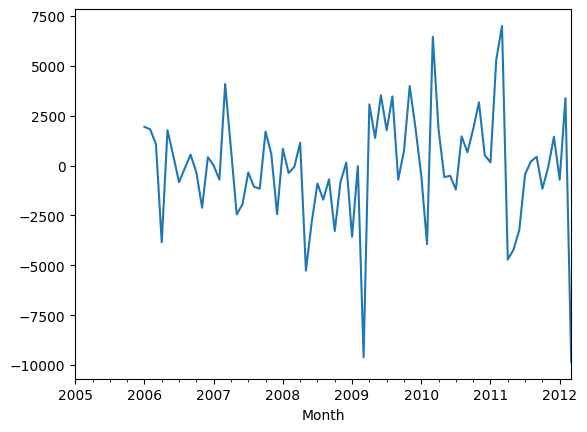

In [150]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

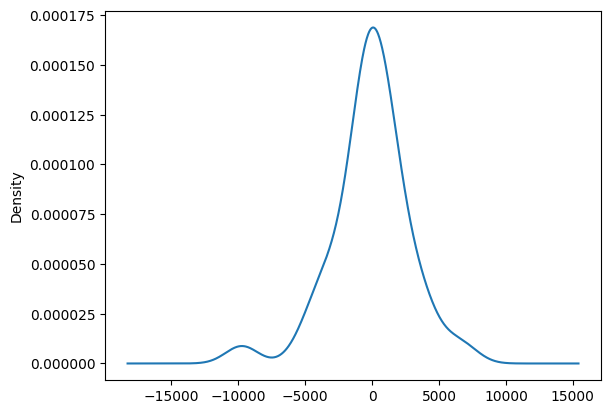

In [151]:
model_SARIMA_fit.resid.plot(kind='kde')

In [152]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_26556\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [153]:
test_data

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference,Predicted_SARIMA
Month,,,,,
2012-04-01,26674,-6326.0,-14689.0,-3715.0,-5552.373521
2012-05-01,23006,-3668.0,2658.0,1630.0,-5307.781889
2012-06-01,20597,-2409.0,1259.0,2109.0,-4297.922462
2012-07-01,17100,-3497.0,-1088.0,968.0,-4820.334870
2012-08-01,14625,-2475.0,1022.0,-192.0,-4565.855107
...,...,...,...,...,...
2017-05-01,31739,-2509.0,8304.0,6530.0,-2695.342713
2017-06-01,30315,-1424.0,1085.0,5681.0,-3099.273197
2017-07-01,25046,-5269.0,-3845.0,5193.0,-3245.981612


<AxesSubplot: xlabel='Month'>

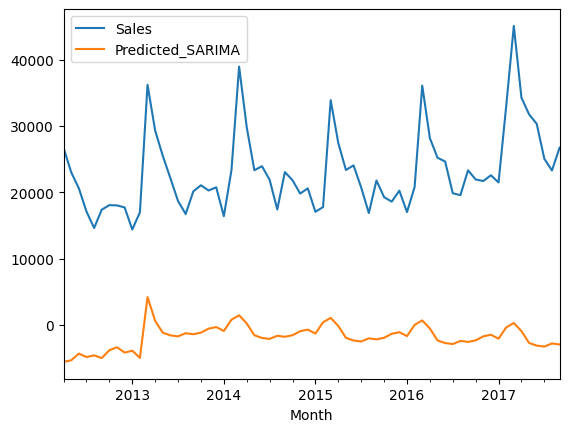

In [154]:
test_data[['Sales','Predicted_SARIMA']].plot()

In [72]:
df

,Sales,First Sales Difference,Second Sales Difference,Sales 12 Difference
Month,,,,
2005-01-01,10827,NaN,NaN,NaN
2005-02-01,12049,1222.0,NaN,NaN
2005-03-01,18298,6249.0,5027.0,NaN
2005-04-01,17834,-464.0,-6713.0,NaN
2005-05-01,16480,-1354.0,-890.0,NaN
...,...,...,...,...
2017-05-01,31739,-2509.0,8304.0,6530.0
2017-06-01,30315,-1424.0,1085.0,5681.0
2017-07-01,25046,-5269.0,-3845.0,5193.0


In [96]:
arima_model = auto_arima(train_data, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=1, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1404.013, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1402.945, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1399.162, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1403.167, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1400.949, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1398.947, Time=1.79 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=inf, Time=6.34 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=7.86 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=nan, Time=1.51 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1399.953, Time=1.79 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1400.658, Time=1.65 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1399.529, Time=1.21 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1402.633, Time=2.82 sec
 ARIMA(0,1,1)(0,1,2)[12] intercept   : 

In [97]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -695.473
Date:                                 Tue, 09 May 2023   AIC                           1398.947
Time:                                         18:27:40   BIC                           1408.163
Sample:                                     01-01-2005   HQIC                          1402.623
                                          - 03-01-2012                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2155      0.164     -1.313      0.189      -0.537       0.106
ma.S.L12      -0.1269      0.142     -0.892      0.372      -0.406       0.152
ma.S.L24      -0.2971      0.085     -3.501      0.000      -0.463      -0.131
sigma2      9.746e+06   1.26e+06      7.752      0.000    7.28e+06    1.22e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                73.90
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.57   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
prediction = pd.DataFrame(arima_model.predict(n_periods=12), index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
2014-06-01,NaN
2014-07-01,NaN
2014-08-01,NaN
2014-09-01,NaN
2014-10-01,NaN
2014-11-01,NaN
2014-12-01,NaN
2015-01-01,NaN
2015-02-01,NaN
